# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [4]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [60]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

X_train_totChol = Xtrain[['totChol']]

print(X_train_totChol.shape)


(1828,)


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes, the default penalty is l2.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** If we apply a penalty in the learning, the resulting coefficients will have a smaller magnitude than if we do not apply a penalty.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No because by default, fit_intercept is set to True which adds a column of 1s to the feature matrix.

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

/Users/jasontam/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jasontam/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


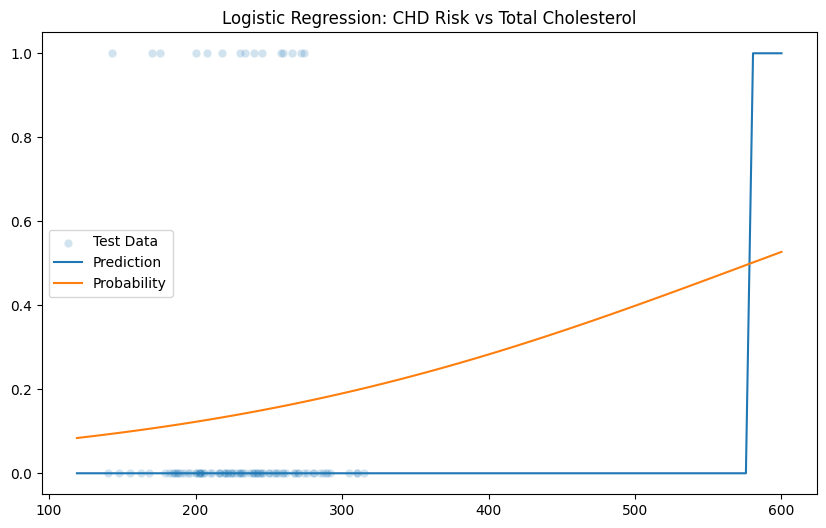

In [100]:
# Question 4 code here.
lr = LogisticRegression(max_iter=1000)  

X_train_totChol = Xtrain[['totChol']]
lr.fit(X_train_totChol, ytrain)

X_test_totChol = Xtest[['totChol']]
xscatter = X_test_totChol['totChol'].values
yscatter = ytest

min_length = min(len(xscatter), len(yscatter))
xscatter = xscatter[:min_length]
yscatter = yscatter[:min_length]

xline = np.linspace(X_test_totChol['totChol'].min(), X_test_totChol['totChol'].max(), 100)
xline_2d = xline.reshape(-1, 1)
yline_label = lr.predict(xline_2d).flatten()
yline_prob = lr.predict_proba(xline_2d)[:, 1]

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=xscatter, y=yscatter, alpha=0.2, label='Test Data')
sns.lineplot(x=xline, y=yline_label, label='Prediction')
sns.lineplot(x=xline, y=yline_prob, label='Probability')


plt.title('Logistic Regression: CHD Risk vs Total Cholesterol')
plt.legend()
plt.show()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 5 total positives, 1 true positive, 4 false positives

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The classifier labeled it positive because the probability of the instance being positive is greater than 0.5

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**YOUR ANSWER HERE:** Yes, because the classifier is able to correctly identify 1 true positive and 4 false positives. Although there were more false positives than true positives, the classifier is still able to correctly identify some of the positive instances.

In [115]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:


## Put code here to compute whatever else you might need to answer the question.


# Check shapes of yline_label and ytest
# Ensure yline_label and ytest are 1D arrays


compute_performance(yline_label, ytest, [0, 1])


tp: 1 tn: 81 fp: 4 fn: 14
Accuracy: 0.82 Recall: 0.067 Precision: 0.2 Sensitivity: 0.067 Specificity: 0.953


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:** Larger age is more strongly associated with CHD.

## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 1 of the test instances are labeled positive by the classifier.

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**YOUR ANSWER:** This classifier is better than the amount-only classifier for finding individuals likely to develop CHD.

In [122]:
# Code for Question 7

# Make predictions on the test data using the all-variable classifier
y_pred_all = lr_all.predict(Xtest)
y_pred_proba_all = lr_all.predict_proba(Xtest)[:, 1]

# Adjust predictions to match ytest size
y_pred_all = y_pred_all[:len(ytest)]
y_pred_proba_all = y_pred_proba_all[:len(ytest)]

# Compute performance measures
print("Performance measures for all-variable classifier:")
compute_performance(y_pred_all, ytest, classes=[0, 1])

# Count positive predictions
positive_count_all = np.sum(y_pred_all)

print(f"\nNumber of test instances labeled positive by all-variable classifier: {positive_count_all}")

# Compare with totChol-only classifier
print("\nPerformance measures for totChol-only classifier:")
y_pred_totChol = lr.predict(X_test_totChol)

# Adjust predictions to match ytest size
y_pred_totChol = y_pred_totChol[:len(ytest)]

compute_performance(y_pred_totChol, ytest, classes=[0, 1])

positive_count_totChol = np.sum(y_pred_totChol)
print(f"\nNumber of test instances labeled positive by totChol-only classifier: {positive_count_totChol}")

# Handle the RuntimeWarning for division by zero in precision calculation
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

Performance measures for all-variable classifier:
tp: 1 tn: 85 fp: 0 fn: 14
Accuracy: 0.86 Recall: 0.067 Precision: 1.0 Sensitivity: 0.067 Specificity: 1.0

Number of test instances labeled positive by all-variable classifier: 1

Performance measures for totChol-only classifier:
tp: 0 tn: 85 fp: 0 fn: 15
Accuracy: 0.85 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0

Number of test instances labeled positive by totChol-only classifier: 0


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** 

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** 


In [109]:
# ROC for totChol-only classifier


ValueError: Found input variables with inconsistent numbers of samples: [100, 1828]

In [ ]:
# ROC for all-variable classifier


# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**YOUR ANSWER:** *The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


In [ ]:
# PRC for totChol-only classifier


In [ ]:
# PRC for all-variable classifier
